In [1]:
## imports
import pandas as pd
import numpy as np
import seaborn as sns

## import the plotnine package
## make sure it's installed
## if not installed, can use
## ! pip install plotnine
import plotnine
from plotnine import *

import matplotlib.pyplot as plt


# A few plot types

## Load DC crime data

In [23]:
## load data on 2020 crimes in DC
df = dc_crim_2020 = pd.read_csv("https://opendata.arcgis.com/datasets/f516e0dd7b614b088ad781b0c4002331_2.csv")

df


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.004500,38.928805,19073083,2020/12/11 05:00:00+00,MIDNIGHT,KNIFE,HOMICIDE,100 - 379 BLOCK OF MICHIGAN AVENUE NE,399610.0,140102.0,...,002302 2,2302.0,Precinct 44,38.928797,-77.004498,NaN,2019/04/29 20:50:27+00,2019/04/29 20:55:58+00,379434829,NaN
1,-76.972651,38.857491,10251445,2020/09/11 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,2300 - 2399 BLOCK OF AINGER PLACE SE,402374.0,132186.0,...,007502 1,7502.0,Precinct 134,38.857483,-76.972648,NaN,2010/09/02 04:00:00+00,2010/09/02 04:00:00+00,379438174,NaN
2,-76.972226,38.854086,10147537,2020/12/21 05:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,2300 - 2499 BLOCK OF HARTFORD STREET SE,402411.0,131808.0,...,007408 2,7408.0,Precinct 115,38.854078,-76.972223,NaN,2010/10/10 02:00:00+00,NaN,379438177,NaN
3,-77.023981,38.900345,5370,2020/01/17 02:39:05+00,EVENING,OTHERS,THEFT F/AUTO,800 - 899 BLOCK OF 9TH STREET NW,397920.0,136943.0,...,005802 5,5802.0,Precinct 129,38.900337,-77.023979,DOWNTOWN,2020/01/11 02:48:51+00,2020/01/17 02:48:54+00,379438181,NaN
4,-77.044182,38.905654,11139598,2020/08/24 04:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,1900 - 1999 BLOCK OF M STREET NW,396168.0,137533.0,...,010700 1,10700.0,Precinct 17,38.905646,-77.044180,GOLDEN TRIANGLE,2011/09/23 06:40:00+00,NaN,379438182,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27928,-77.024529,38.918262,20120844,2020/08/24 16:13:17+00,DAY,OTHERS,MOTOR VEHICLE THEFT,2100 - 2199 BLOCK OF VERMONT AVENUE NW,397873.0,138932.0,...,004401 3,4401.0,Precinct 22,38.918255,-77.024527,NaN,2020/08/24 14:02:36+00,2020/08/24 15:30:26+00,379952878,NaN
27929,-76.982318,38.852403,20121091,2020/08/25 00:39:15+00,EVENING,GUN,ASSAULT W/DANGEROUS WEAPON,3033 - 3097 BLOCK OF STANTON ROAD SE,401535.0,131621.0,...,007404 1,7404.0,Precinct 117,38.852396,-76.982316,NaN,2020/08/24 23:34:07+00,2020/08/25 00:40:19+00,379952879,NaN
27930,-77.053302,38.906236,20124168,2020/08/31 13:39:20+00,DAY,OTHERS,THEFT F/AUTO,1200 - 1299 BLOCK OF 25TH STREET NW,395377.0,137598.0,...,005503 2,5503.0,Precinct 4,38.906228,-77.053299,NaN,2020/08/30 22:30:22+00,2020/08/30 22:45:05+00,379952880,NaN
27931,-77.028143,38.959682,20069372,2020/05/08 23:30:46+00,EVENING,OTHERS,ROBBERY,5700 - 5899 BLOCK OF GEORGIA AVENUE NW,397561.0,143530.0,...,002002 2,2002.0,Precinct 54,38.959674,-77.028141,NaN,2020/05/08 21:26:06+00,2020/05/08 21:33:33+00,379952881,NaN


## Plot type one: bar plot

**Goal**: bar plot where x axis is what shift it is; y axis is the count of unique crime reports (using `OBJECT_ID` as unique indicator)

In [7]:
## step one: create the summary we want to plot
C = count_byshift = pd.DataFrame(df.groupby('SHIFT')['OBJECTID'].nunique()).reset_index()
count_byshift


,SHIFT,OBJECTID
0,DAY,10094
1,EVENING,12324
2,MIDNIGHT,5515


#### Explore the data: Make a simple graph and see if you need it

([<matplotlib.axis.XTick at 0x14ae2ea90>,
 [Text(0, 0, 'DAY'), Text(1, 0, 'EVENING'), Text(2, 0, 'MIDNIGHT')])

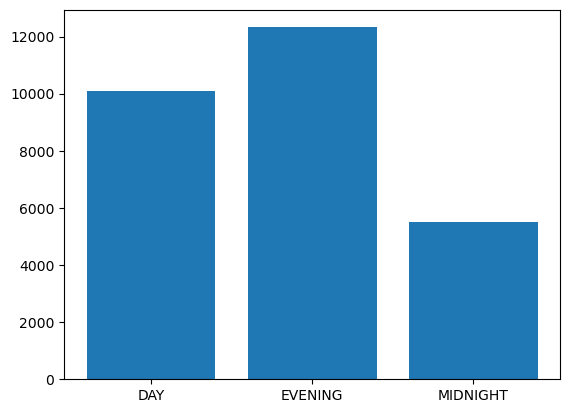

In [8]:
plt.bar(C.index, C.OBJECTID)
plt.xticks(C.index, C.SHIFT)

#### Make the graph look pretty

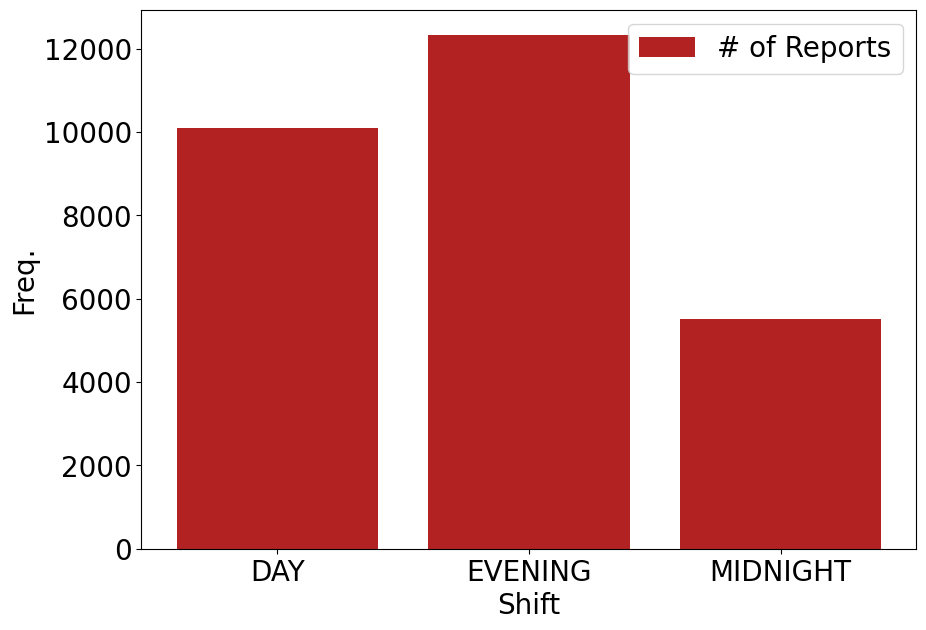

In [9]:
plt.figure(figsize=(10,7)) # Define the size of the graph

plt.bar(C.index, C.OBJECTID, label = "# of Reports", 
        color="firebrick") # Define the figure object

plt.xticks(C.index, C.SHIFT, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Shift", fontsize=20)
plt.ylabel("Freq.", fontsize=20)

plt.legend(fontsize=20)

plt.savefig("barplot.png", bbox_inches="tight")

#### Try it yourself with METHOD
Create a bar chart on the METHOD column.
Named colors: https://matplotlib.org/stable/gallery/color/named_colors.html

   METHOD  OBJECTID
0     GUN      2035
1   KNIFE       641
2  OTHERS     25257


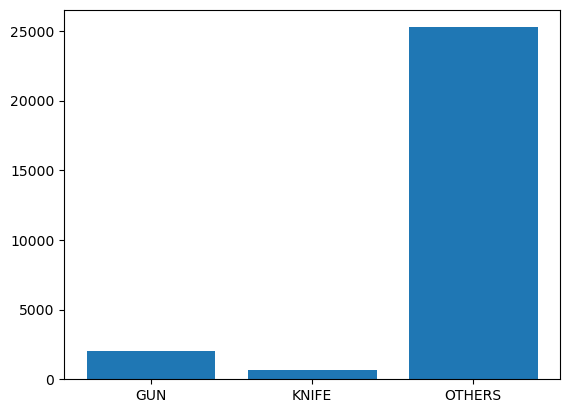

In [16]:
M = count_by_method = pd.DataFrame(df.groupby('METHOD')['OBJECTID'].nunique()).reset_index()

print(M)

plt.bar(M.index, M.OBJECTID)
plt.xticks(M.index, M.METHOD)
plt.savefig('method_bar.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

# Histograms and Densities

(array([  38.,  150.,  292.,  515.,  867.,  776., 1261., 2622., 4522.,
        2440., 2251., 3052., 3071., 1829.,  907.,  789.,  849.,  853.,
         649.,  200.]),
 array([-77.11364471, -77.10346988, -77.09329506, -77.08312024,
        -77.07294541, -77.06277059, -77.05259577, -77.04242094,
        -77.03224612, -77.0220713 , -77.01189647, -77.00172165,
        -76.99154683, -76.981372  , -76.97119718, -76.96102236,
        -76.95084753, -76.94067271, -76.93049789, -76.92032306,
        -76.91014824]),
 <BarContainer object of 20 artists>)

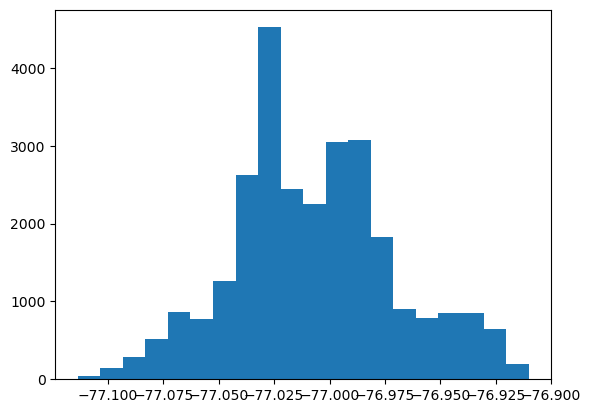

In [17]:
plt.hist( df.X, bins=20 )

/Users/janehuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janehuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/janehuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janehuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

<Axes: xlabel='X', ylabel='Density'>

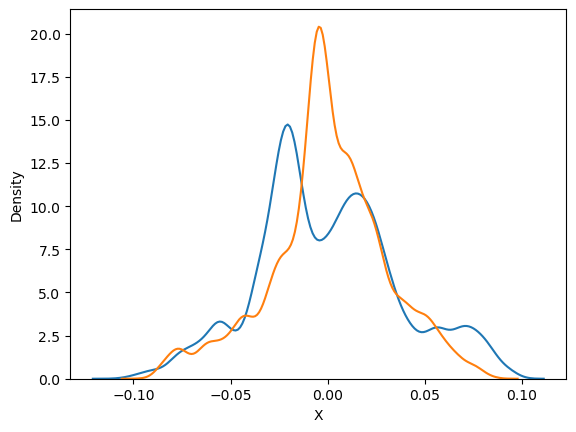

In [18]:
sns.kdeplot( df.X - df.X.mean())
sns.kdeplot( df.Y - df.Y.mean())

#### Your Turn: Add labels (X and Y), plot the legend, and change the color of your density
- What are the differences in distribution you observe?

/Users/janehuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janehuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/janehuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janehuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

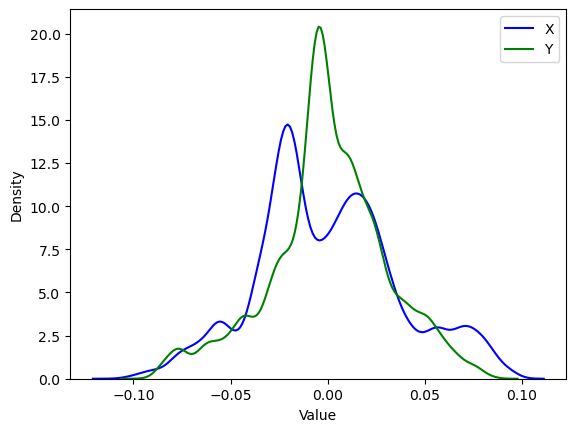

In [22]:
sns.kdeplot(df['X'] - df['X'].mean(), label='X', color='blue')
sns.kdeplot(df['Y'] - df['Y'].mean(), label='Y', color='green')

# Add labels for X and Y axes
plt.xlabel('Value')
plt.ylabel('Density')

# Add a legend to distinguish between X and Y
plt.legend()

plt.savefig('density.png', dpi=300, bbox_inches='tight')

## Two dimensional density plots

<AxesSubplot: xlabel='X', ylabel='Y'>

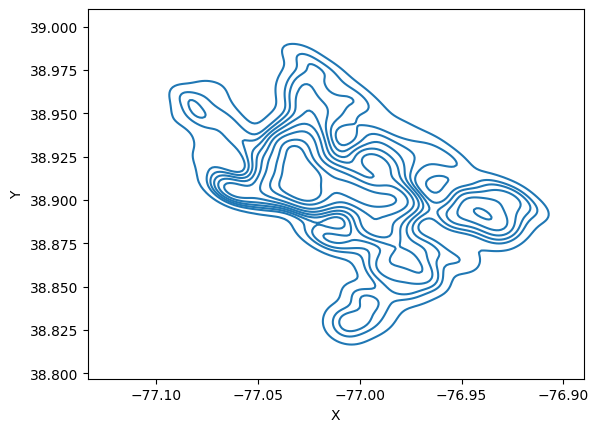

In [20]:
sns.kdeplot(x = df.X, y = df.Y)

#### Your turn: Seperately plot the densities for WARDS 1, 2, and 3

- Should take six lines of code. Hint: Do it for 1 first.

In [ ]:
sns.kdeplot(x = df.X, y = df.Y)

# Line Plots
**Goal**: bar plot where x axis is month; y axis is the count of unique crime reports (using `OBJECT_ID` as unique indicator); want line graph to be able to see trends over time in count of reported crimes

In [32]:
df['report_month'] = pd.to_datetime(df.REPORT_DAT).dt.month
df[["REPORT_DAT", "report_month"]].sample(n = 3)

,REPORT_DAT,report_month
10360,2020/08/14 14:58:19+00,8
23090,2020/02/21 14:39:58+00,2
8235,2020/11/14 01:08:54+00,11


In [33]:
### then, group by month and find unique reports; same syntax as above
### just a diff grouping variable 
C = count_bymonth = df.groupby('report_month')['OBJECTID'].nunique().reset_index()
C

,report_month,OBJECTID
0,1,2950
1,2,2540
2,3,2201
3,4,1652
4,5,1834
5,6,2276
6,7,2134
7,8,2433
8,9,2571
9,10,2563


(0.0, 4000.0)

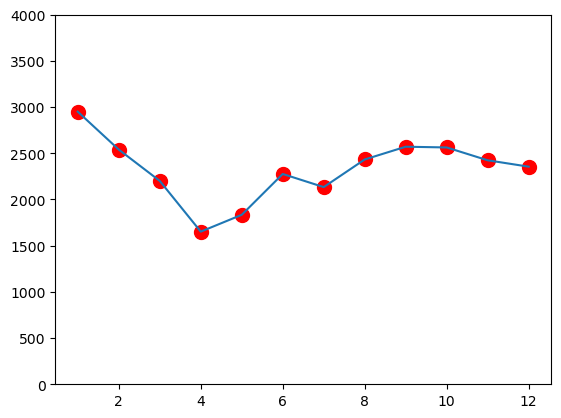

In [34]:
plt.plot(C.report_month, C.OBJECTID)

plt.scatter(C.report_month, C.OBJECTID, 
            s=100, c="red")

plt.ylim(0,4000)

#### Your Turn: Now add the appropriate x and y labels following the same logic as the bar graph

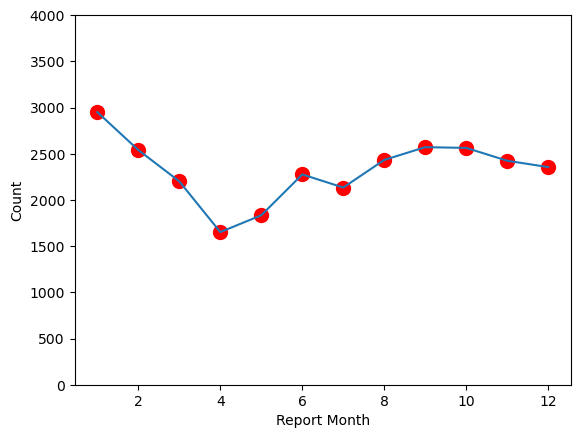

In [38]:
plt.plot(C.report_month, C.OBJECTID)

plt.scatter(C.report_month, C.OBJECTID, 
            s=100, c="red")

plt.ylim(0,4000)

plt.xlabel('Report Month')
plt.ylabel('Count')

plt.savefig('line.png', dpi=300, bbox_inches='tight')



# Read onward if you have experience with R & ggplot

### Other ways to create bars

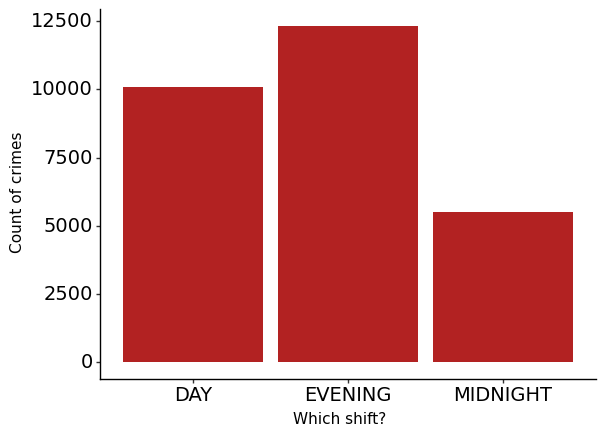

<ggplot: (8790731287113)>

In [4]:

## one way: plot and display in notebook
(ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) + # base layer with data and x and y axis 
            geom_bar(stat = "identity", fill = "firebrick") + # telling it to expect a bar chart; identity
             # arg just means to use the y value 
            theme_classic() + # aesthetics
            xlab("Which shift?") + # custom label for x axis
            ylab("Count of crimes") + # custom label for y axis
            theme(axis_text = element_text(size = 14, color = "black"))) # make font bigger


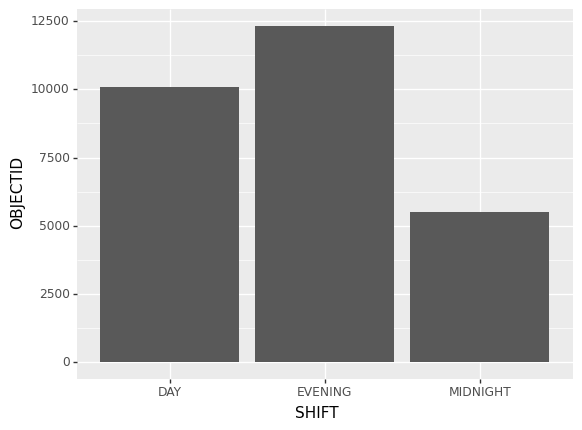

<ggplot: (8790731605815)>

In [5]:

## another way: save to png- right now,
## it's writing to same path our df is stored in; 
plot_shifts = (ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) +
            geom_bar(stat = "identity", fill = "firebrick") +
            theme_classic() +
            xlab("Which shift?") +
            ylab("Count of crimes") +
            theme(axis_text = element_text(size = 14, color = "black")))
plot_shifts.save("plot_shifts.png", 
                width = 12,
                height = 8,
                verbose = False)


## what happens if we don't specify theme or color of bars? diff aesthetics
## also doesnt give us informative x and y labels (for pset please give 
## informative labels)
(ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) +
            geom_bar(stat = "identity"))

## Plot type two: line graph

In [6]:
## group by month and find unique reports
### first, extract month from report_dat (just 
### with the noncleaned version)

dc_crim_2020['report_month'] = pd.to_datetime(dc_crim_2020.REPORT_DAT,
                                             errors = "coerce").dt.month
### double check this worked
dc_crim_2020[["REPORT_DAT", "report_month"]].sample(n = 3)

### then, group by month and find unique reports; same syntax as above
### just a diff grouping variable 
count_bymonth = pd.DataFrame(dc_crim_2020.groupby('report_month')['OBJECTID'].nunique()).reset_index()
count_bymonth


,REPORT_DAT,report_month
26209,2020/08/30 23:43:30+00,8
11179,2020/03/23 02:47:15+00,3
13388,2020/01/28 04:21:18+00,1


,report_month,OBJECTID
0,1,2948
1,2,2537
2,3,2200
3,4,1652
4,5,1831
5,6,2275
6,7,2132
7,8,2431
8,9,2572
9,10,2562


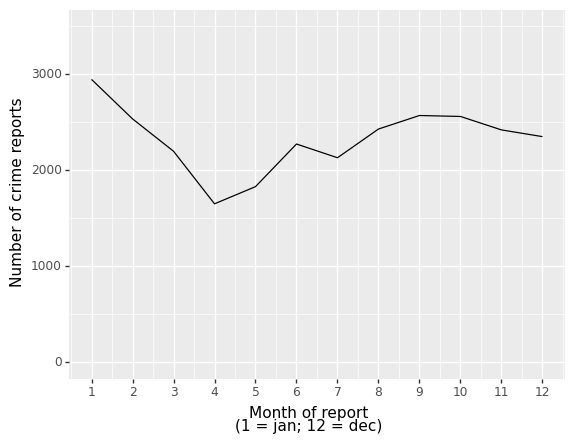

<ggplot: (8790733814212)>

In [7]:

### finally, plot result as line graph
### nearly identical syntax to above
### but uses month as the xaxis rather than
### police shift and geom_line()
### rather than geom_bar()
(ggplot(count_bymonth, aes(x = 'report_month', 
            y = 'OBJECTID')) +
            geom_line() +
            ylim(0, 3500) +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            scale_x_continuous(breaks = np.arange(1, 13)))

## Making more complex: adding facets

What if we want to create the above but visualize separately for each ward?

Can group by two variables (see lecture slide) and add a line to facet_wrap

,report_month,WARD,OBJECTID
0,1,1,369
1,1,2,654
2,1,3,222
3,1,4,313
4,1,5,456


,report_month,WARD,OBJECTID
91,12,4,253
92,12,5,380
93,12,6,305
94,12,7,343
95,12,8,278


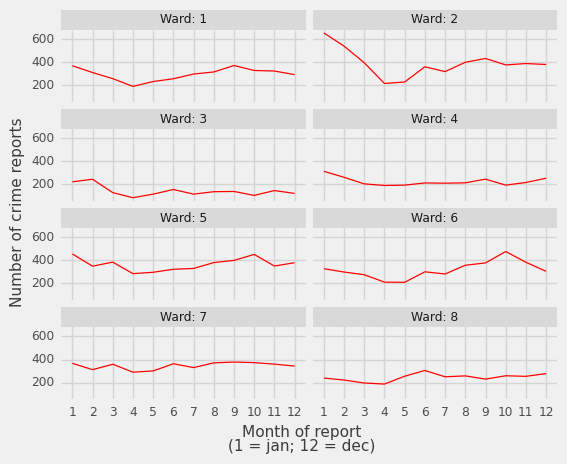

<ggplot: (8790732038873)>

In [8]:
### add ward as grouping var
count_bymonth_byw = pd.DataFrame(dc_crim_2020.groupby(['report_month',
                                                   'WARD'])['OBJECTID'].nunique()).reset_index()
count_bymonth_byw.head()
count_bymonth_byw.tail()

## make the facetting var prettier 
## by noting "Ward" before the
count_bymonth_byw['WARD_name'] = 'Ward: ' + count_bymonth_byw.WARD.astype(str)

### finally, plot result as line graph
### nearly identical syntax to above
### but uses month as the xaxis rather than
### police shift and geom_line()
### rather than geom_bar()
(ggplot(count_bymonth_byw, aes(x = 'report_month', 
            y = 'OBJECTID')) +
            geom_line(color = "red") +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            facet_wrap('WARD_name', ncol = 2) + # ADDITIONAL LINE 
            scale_x_continuous(breaks = np.arange(1, 13)) +
            theme_538() # using 538 theme 
            ) 

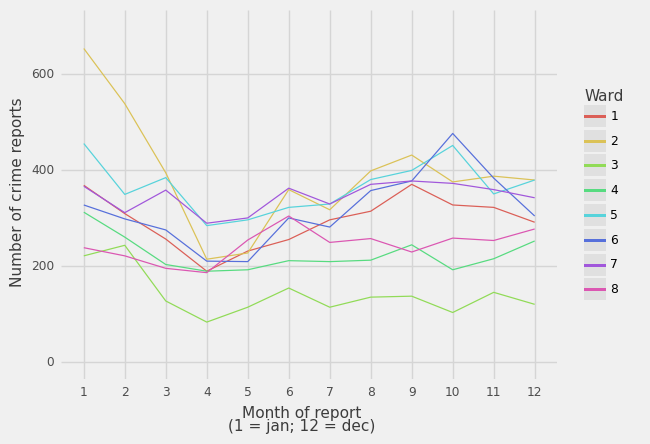

<ggplot: (8790731282695)>

In [12]:
### rather than geom_bar()
(ggplot(count_bymonth_byw, aes(x = 'report_month', 
            y = 'OBJECTID', group = 'factor(WARD)', color = 'factor(WARD)')) +
            geom_line() +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            scale_x_continuous(breaks = np.arange(1, 13)) +
            theme_538() + # using 538 theme +
             labs(color = "Ward") +
             ylim(0, 700)
            ) 

## How to use Markdown in Jupyter Notebook

#### Title

normal text

$$
/sum
$$